In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
!pip install ensemble-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 139.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nv

In [ ]:
!pip install -U pip wheel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
from ensemble_transformers import EnsembleModelForSequenceClassification
import pandas as pd
from sklearn.metrics import accuracy_score
import torch
from tqdm import tqdm

In [ ]:
torch.device("cuda" if torch.cuda.is_available() else "cpu")

device(type='cuda')

In [ ]:
from math import trunc

models_to_use = ["no0ne-97/misoginia-bert-spanish-wwm-cased-task2-V1", "no0ne-97/misoginia-roberta-base-bne-task2-V1", "no0ne-97/misoginia-beto-sentiment-analysis-task2-V1"]
ensemble = EnsembleModelForSequenceClassification.from_multiple_pretrained(*models_to_use)
ensemble.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/902 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/730k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/927 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/851k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/509k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.66M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.15k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/902 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/730k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/78.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/MiSongGiny/test_task2.csv', encoding='utf-8')
df_test = df_test.dropna(subset=['lyrics'])
# df_test['label'] = df_test['label'].map({'NM': 0, 'M': 1})
df_test['label'].value_counts()

,count
label,
0,53
1,43
2,32
3,27


In [ ]:
df_test.head()

,Unnamed: 0,id,lyrics,label
0,181,T2_TRAIN_0182,i\nDonde estas amor?\nQuiero saber de ti...\nA...,0
1,955,T2_TRAIN_0956,"\n[Letra de ""Círculo Vicioso""]\n\n[Verso]\nMed...",2
2,1407,GS_V_Herida que Sangra,"[Verso]\nTu risa me hiere, tu voz me traicionó...",2
3,1077,T2_TRAIN_1078,n\nVoy a tratar de hacerte feliz de nuevo\nA c...,0
4,847,T2_TRAIN_0848,"en\n\n[Outro]\n¡Muy bien!\n[Letra de ""Voy A Pa...",1


In [ ]:
for model in ensemble.models:
    print(model.config.num_labels)  # debe ser 2

4
4
4


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

y_true = []
y_pred = []

for index, row, in tqdm(df_test.iterrows()):
    lyrics = row["lyrics"]
    true_label = row["label"]


    if len(lyrics) > 1000:
        lyrics = lyrics[:1000]


    output = ensemble(lyrics)
    probs = [F.softmax(logit, dim=1) for logit in output.logits if logit.shape[-1] == 4]

    if len(probs) == 0:
        raise ValueError("No hay modelos con logits de 2 clases.")

    # Paso 3: promedio de probabilidades
    avg_probs = torch.stack(probs).mean(dim=0)

    # Paso 4: predicción final
    pred_class = torch.argmax(avg_probs, dim=1).item()

    # Guardar etiquetas
    y_true.append(true_label)
    y_pred.append(pred_class)

155it [00:13, 11.86it/s]


Reporte de clasificación (votación mayoritaria):
              precision    recall  f1-score   support

          NR       0.71      0.79      0.75        53
           S       0.67      0.79      0.72        43
           V       0.89      0.78      0.83        32
           H       1.00      0.63      0.77        27

    accuracy                           0.76       155
   macro avg       0.82      0.75      0.77       155
weighted avg       0.79      0.76      0.76       155



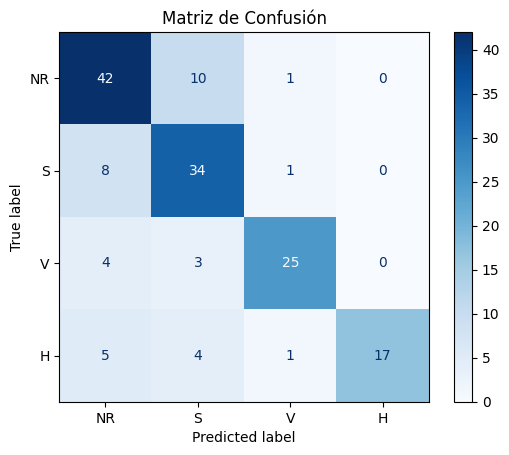

In [ ]:
# === Evaluación final ===
print("Reporte de clasificación (votación mayoritaria):")
print(classification_report(y_true, y_pred, target_names=["NR", "S", "V", "H"]))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NR", "S", "V", "H"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

#Final classification



## Final classification ensemble

In [ ]:
import pandas as pd

new_df = pd.DataFrame(columns=['id', 'label'])


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/MiSongGiny/data/test_data/track_2_public_test_rev002.csv', encoding='utf-8')

In [ ]:
df.head()

,id,lyrics
0,T2_TEST_0001,\nHe cobrado el sueldo del último mes\nLa paga...
1,T2_TEST_0002,s\nQuererme me dijistes aquel dia\nY que siemp...
2,T2_TEST_0003,"\n[Letra de ""Historia De Taxi""]\n\n[Intro]\n¡T..."
3,T2_TEST_0004,"rimas\nNo llores mujer\n[Letra de ""No Llores M..."
4,T2_TEST_0005,"[Letra de ""Nadie Tiene Que Saber"" ft. El Boy C..."


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

y_true = []
y_pred = []

for index, row, in tqdm(df.iterrows()):
    id = row["id"]
    lyrics = row["lyrics"]

    if len(lyrics) > 1000:
        lyrics = lyrics[:1000]


    output = ensemble(lyrics)
    probs = [F.softmax(logit, dim=1) for logit in output.logits if logit.shape[-1] == 4]

    if len(probs) == 0:
        raise ValueError("No hay modelos con logits de 4 clases.")

    # Paso 3: promedio de probabilidades
    avg_probs = torch.stack(probs).mean(dim=0)

    # Paso 4: predicción final
    pred_class = torch.argmax(avg_probs, dim=1).item()

    df_new_row = pd.DataFrame({'id': [id], 'label': [pred_class]})
    df_new_row['label'] = df_new_row['label'].map({0: 'NR', 1: 'S', 2: 'V', 3: 'H'})
    new_df = pd.concat([new_df, df_new_row], ignore_index=True)




2it [00:00,  5.69it/s]

[tensor([[0.0752, 0.8584, 0.0543, 0.0121]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.3771, 0.3085, 0.1919, 0.1225]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.5228, 0.0840, 0.2752, 0.1180]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.9525, 0.0128, 0.0133, 0.0214]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.7257, 0.0558, 0.0747, 0.1438]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.8279, 0.0645, 0.0482, 0.0594]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


3it [00:00,  5.08it/s]

[tensor([[0.3482, 0.0231, 0.2397, 0.3890]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.2109, 0.3855, 0.3277, 0.0759]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.6198, 0.0825, 0.1686, 0.1291]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


5it [00:00,  5.05it/s]

[tensor([[0.8392, 0.0846, 0.0560, 0.0202]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.6222, 0.1465, 0.1540, 0.0773]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.6117, 0.2005, 0.0924, 0.0954]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.0133, 0.9778, 0.0071, 0.0018]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.2251, 0.5577, 0.1485, 0.0687]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.4728, 0.3157, 0.1291, 0.0824]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


7it [00:01,  6.12it/s]

[tensor([[0.8642, 0.1177, 0.0122, 0.0059]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.8693, 0.0478, 0.0308, 0.0521]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.8311, 0.0491, 0.0523, 0.0675]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.9772, 0.0031, 0.0079, 0.0118]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.8326, 0.0376, 0.0454, 0.0844]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.6501, 0.2090, 0.0492, 0.0917]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


9it [00:01,  5.31it/s]

[tensor([[0.5363, 0.0276, 0.2791, 0.1570]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.0776, 0.7208, 0.1671, 0.0344]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.4321, 0.1623, 0.2902, 0.1154]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.2417, 0.0992, 0.5873, 0.0718]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.1200, 0.5386, 0.2733, 0.0681]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.4490, 0.3139, 0.1612, 0.0758]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


11it [00:01,  6.36it/s]

[tensor([[0.0099, 0.9654, 0.0219, 0.0028]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.1512, 0.4058, 0.3562, 0.0868]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.2574, 0.6301, 0.0561, 0.0564]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.0090, 0.9830, 0.0059, 0.0020]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.7709, 0.1006, 0.0652, 0.0632]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.5503, 0.3451, 0.0475, 0.0571]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


13it [00:02,  7.49it/s]

[tensor([[0.0176, 0.9723, 0.0083, 0.0019]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.3046, 0.3469, 0.2409, 0.1076]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.6928, 0.2293, 0.0293, 0.0486]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.9917, 0.0022, 0.0027, 0.0035]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.8866, 0.0265, 0.0341, 0.0528]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.8787, 0.0324, 0.0230, 0.0659]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


15it [00:02,  8.28it/s]

[tensor([[0.0578, 0.9320, 0.0081, 0.0021]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.5227, 0.3130, 0.1077, 0.0567]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.7406, 0.1835, 0.0282, 0.0477]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.9879, 0.0017, 0.0043, 0.0061]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.9004, 0.0301, 0.0248, 0.0447]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.8769, 0.0335, 0.0427, 0.0470]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


17it [00:02,  8.38it/s]

[tensor([[0.0045, 0.9731, 0.0202, 0.0022]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.0802, 0.7580, 0.1325, 0.0294]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.3276, 0.5264, 0.0991, 0.0470]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.1517, 0.8103, 0.0273, 0.0107]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.8123, 0.0749, 0.0565, 0.0563]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.6304, 0.2130, 0.1143, 0.0422]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


19it [00:02,  8.49it/s]

[tensor([[0.0043, 0.9913, 0.0034, 0.0010]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.0549, 0.8236, 0.0993, 0.0223]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.2933, 0.6123, 0.0372, 0.0571]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.9813, 0.0120, 0.0040, 0.0026]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.7497, 0.1084, 0.0750, 0.0669]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.8829, 0.0441, 0.0218, 0.0512]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


21it [00:03,  9.05it/s]

[tensor([[0.8349, 0.0340, 0.0481, 0.0829]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.5715, 0.0917, 0.1662, 0.1706]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.5554, 0.0660, 0.2436, 0.1349]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.0041, 0.0211, 0.9500, 0.0248]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.1633, 0.4507, 0.3182, 0.0678]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.3233, 0.2654, 0.3200, 0.0913]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.5934, 0.0062, 0.2344, 0.1660]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.6175, 0.0771, 0.1745, 0.1310]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.6453, 0.0803, 0.1730, 0.1014]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


25it [00:03,  9.91it/s]

[tensor([[0.9914, 0.0020, 0.0028, 0.0039]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.9048, 0.0294, 0.0232, 0.0426]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.9001, 0.0296, 0.0283, 0.0420]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.9894, 0.0028, 0.0029, 0.0049]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.8714, 0.0284, 0.0306, 0.0696]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.7238, 0.0511, 0.1141, 0.1110]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.2394, 0.1245, 0.5064, 0.1296]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.2098, 0.2695, 0.4288, 0.0919]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.6093, 0.0937, 0.2120, 0.0849]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


27it [00:03,  9.36it/s]

[tensor([[0.9065, 0.0126, 0.0485, 0.0324]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.8526, 0.0478, 0.0401, 0.0594]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.7807, 0.1247, 0.0305, 0.0642]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.0424, 0.9394, 0.0133, 0.0049]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.8598, 0.0700, 0.0318, 0.0384]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.7185, 0.1635, 0.0580, 0.0600]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


29it [00:03,  8.50it/s]

[tensor([[0.1687, 0.8224, 0.0057, 0.0033]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.0851, 0.8157, 0.0748, 0.0244]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.3709, 0.4807, 0.1130, 0.0354]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.0042, 0.9906, 0.0040, 0.0012]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.0761, 0.7808, 0.1115, 0.0317]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.3392, 0.5703, 0.0381, 0.0525]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


31it [00:04,  8.14it/s]

[tensor([[0.0503, 0.9395, 0.0070, 0.0032]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.1914, 0.6157, 0.1413, 0.0516]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.3991, 0.3156, 0.2373, 0.0480]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.0044, 0.9780, 0.0154, 0.0023]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.2208, 0.5331, 0.1872, 0.0589]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.4246, 0.1242, 0.2258, 0.2253]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


33it [00:04,  8.67it/s]

[tensor([[0.0807, 0.7099, 0.1649, 0.0445]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.1656, 0.6044, 0.1556, 0.0744]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.7009, 0.1712, 0.0339, 0.0939]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.9914, 0.0019, 0.0029, 0.0038]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.9023, 0.0308, 0.0239, 0.0430]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.8994, 0.0315, 0.0312, 0.0379]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


35it [00:04,  8.67it/s]

[tensor([[0.0082, 0.9178, 0.0690, 0.0049]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.5279, 0.2162, 0.1630, 0.0929]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.2138, 0.1361, 0.5778, 0.0723]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.1450, 0.8426, 0.0095, 0.0029]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.1957, 0.6288, 0.1326, 0.0429]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.4558, 0.4565, 0.0541, 0.0335]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]
[tensor([[0.9925, 0.0023, 0.0020, 0.0032]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.9026, 0.0328, 0.0234, 0.0413]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.9158, 0.0277, 0.0180, 0.0386]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


37it [00:04,  7.56it/s]

[tensor([[0.0154, 0.9718, 0.0101, 0.0027]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.1655, 0.6533, 0.1362, 0.0450]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>), tensor([[0.2408, 0.6056, 0.1119, 0.0417]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)]


KeyboardInterrupt: 

In [ ]:
new_df.head()

,id,label
0,T2_TEST_0001,S
1,T2_TEST_0002,NR
2,T2_TEST_0003,NR
3,T2_TEST_0004,NR
4,T2_TEST_0005,S


In [ ]:
new_df.to_csv('/content/drive/MyDrive/MiSongGiny/answers/track_2_predictions.csv', index=False)

## Final classification Roberta

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_name = "no0ne-97/misoginia-bert-spanish-wwm-cased-task2-V1"

# Carga el modelo y el tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# A GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
new_df = pd.DataFrame(columns=['id', 'label'])

In [ ]:
def predict(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=-1)
        predicted_class = torch.argmax(probs, dim=1).item()

    return predicted_class, probs.squeeze().tolist()

In [ ]:
for index, row, in tqdm(df.iterrows()):
    id = row["id"]
    lyrics = row["lyrics"]

    if len(lyrics) > 1000:
        lyrics = lyrics[:1000]
    label, probabilidades = predict(lyrics)

    df_new_row = pd.DataFrame({'id': [id], 'label': [label]})
    df_new_row['label'] = df_new_row['label'].map({0: 'NR', 1: 'S', 2: 'V', 3: 'H'})
    new_df = pd.concat([new_df, df_new_row], ignore_index=True)

293it [00:08, 35.15it/s]


In [ ]:
new_df['label'].value_counts()

,count
label,
S,142
NR,115
V,31
H,5


In [ ]:
new_df.to_csv('/content/drive/MyDrive/MiSongGiny/answers/track_2_predictions_bert.csv', index=False)